# Incidence du syndrome grippal

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [64]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [65]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202239          3   51547   43092.0   60002.0      78        65.0   
1     202238          3   34384   28715.0   40053.0      52        43.0   
2     202237          3   26564   21654.0   31474.0      40        33.0   
3     202236          3   19303   15018.0   23588.0      29        23.0   
4     202235          3   12914    9679.0   16149.0      19        14.0   
5     202234          3   10708    7334.0   14082.0      16        11.0   
6     202233          3   12926    8869.0   16983.0      19        13.0   
7     202232          3   22257   16158.0   28356.0      34        25.0   
8     202231          3   21828   16268.0   27388.0      33        25.0   
9     202230          3   19663   14779.0   24547.0      30        23.0   
10    202229          3   24268   18906.0   29630.0      37        29.0   
11    202228          3   24845   19214.0   30476.0      37        29.0   
12    202227          3   40745   33994.0   47496.0      61        51.0   
13    202226          3   34010   28521.0   39499.0      51        43.0   
14    202225          3   23377   19042.0   27712.0      35        28.0   
15    202224          3   26328   21829.0   30827.0      40        33.0   
16    202223          3   23430   18950.0   27910.0      35        28.0   
17    202222          3   18951   15099.0   22803.0      29        23.0   
18    202221          3   13632   10251.0   17013.0      21        16.0   
19    202220          3   19787   15756.0   23818.0      30        24.0   
20    202219          3   17884   14079.0   21689.0      27        21.0   
21    202218          3   30353   25089.0   35617.0      46        38.0   
22    202217          3   36006   30373.0   41639.0      54        46.0   
23    202216          3   49949   42836.0   57062.0      75        64.0   
24    202215          3  100806   90824.0  110788.0     152       137.0   
25    202214          3  155441  143891.0  166991.0     234       217.0   
26    202213          3  191914  179558.0  204270.0     289       270.0   
27    202212          3  166224  155035.0  177413.0     251       234.0   
28    202211          3  122849  113306.0  132392.0     185       171.0   
29    202210          3   87904   79741.0   96067.0     133       121.0   
...      ...        ...     ...       ...       ...     ...         ...   
1949  198521          3   26096   19621.0   32571.0      47        35.0   
1950  198520          3   27896   20885.0   34907.0      51        38.0   
1951  198519          3   43154   32821.0   53487.0      78        59.0   
1952  198518          3   40555   29935.0   51175.0      74        55.0   
1953  198517          3   34053   24366.0   43740.0      62        44.0   
1954  198516          3   50362   36451.0   64273.0      91        66.0   
1955  198515          3   63881   45538.0   82224.0     116        83.0   
1956  198514          3  134545  114400.0  154690.0     244       207.0   
1957  198513          3  197206  176080.0  218332.0     357       319.0   
1958  198512          3  245240  223304.0  267176.0     445       405.0   
1959  198511          3  276205  252399.0  300011.0     501       458.0   
1960  198510          3  353231  326279.0  380183.0     640       591.0   
1961  198509          3  369895  341109.0  398681.0     670       618.0   
1962  198508          3  389886  359529.0  420243.0     707       652.0   
1963  198507          3  471852  432599.0  511105.0     855       784.0   
1964  198506          3  565825  518011.0  613639.0    1026       939.0   
1965  198505          3  637302  592795.0  681809.0    1155      1074.0   
1966  198504          3  424937  390794.0  459080.0     770       708.0   
1967  198503          3  213901  174689.0  253113.0     388       317.0   
1968  198502          3   97586   80949.0  114223.0     177       147.0   
1969  198501          3   85489   65918.0  105060.0     155       120.0   
1970  198452          3   84830  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [66]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1742  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1742        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [67]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202239          3   51547   43092.0   60002.0      78        65.0   
1     202238          3   34384   28715.0   40053.0      52        43.0   
2     202237          3   26564   21654.0   31474.0      40        33.0   
3     202236          3   19303   15018.0   23588.0      29        23.0   
4     202235          3   12914    9679.0   16149.0      19        14.0   
5     202234          3   10708    7334.0   14082.0      16        11.0   
6     202233          3   12926    8869.0   16983.0      19        13.0   
7     202232          3   22257   16158.0   28356.0      34        25.0   
8     202231          3   21828   16268.0   27388.0      33        25.0   
9     202230          3   19663   14779.0   24547.0      30        23.0   
10    202229          3   24268   18906.0   29630.0      37        29.0   
11    202228          3   24845   19214.0   30476.0      37        29.0   
12    202227          3   40745   33994.0   47496.0      61        51.0   
13    202226          3   34010   28521.0   39499.0      51        43.0   
14    202225          3   23377   19042.0   27712.0      35        28.0   
15    202224          3   26328   21829.0   30827.0      40        33.0   
16    202223          3   23430   18950.0   27910.0      35        28.0   
17    202222          3   18951   15099.0   22803.0      29        23.0   
18    202221          3   13632   10251.0   17013.0      21        16.0   
19    202220          3   19787   15756.0   23818.0      30        24.0   
20    202219          3   17884   14079.0   21689.0      27        21.0   
21    202218          3   30353   25089.0   35617.0      46        38.0   
22    202217          3   36006   30373.0   41639.0      54        46.0   
23    202216          3   49949   42836.0   57062.0      75        64.0   
24    202215          3  100806   90824.0  110788.0     152       137.0   
25    202214          3  155441  143891.0  166991.0     234       217.0   
26    202213          3  191914  179558.0  204270.0     289       270.0   
27    202212          3  166224  155035.0  177413.0     251       234.0   
28    202211          3  122849  113306.0  132392.0     185       171.0   
29    202210          3   87904   79741.0   96067.0     133       121.0   
...      ...        ...     ...       ...       ...     ...         ...   
1949  198521          3   26096   19621.0   32571.0      47        35.0   
1950  198520          3   27896   20885.0   34907.0      51        38.0   
1951  198519          3   43154   32821.0   53487.0      78        59.0   
1952  198518          3   40555   29935.0   51175.0      74        55.0   
1953  198517          3   34053   24366.0   43740.0      62        44.0   
1954  198516          3   50362   36451.0   64273.0      91        66.0   
1955  198515          3   63881   45538.0   82224.0     116        83.0   
1956  198514          3  134545  114400.0  154690.0     244       207.0   
1957  198513          3  197206  176080.0  218332.0     357       319.0   
1958  198512          3  245240  223304.0  267176.0     445       405.0   
1959  198511          3  276205  252399.0  300011.0     501       458.0   
1960  198510          3  353231  326279.0  380183.0     640       591.0   
1961  198509          3  369895  341109.0  398681.0     670       618.0   
1962  198508          3  389886  359529.0  420243.0     707       652.0   
1963  198507          3  471852  432599.0  511105.0     855       784.0   
1964  198506          3  565825  518011.0  613639.0    1026       939.0   
1965  198505          3  637302  592795.0  681809.0    1155      1074.0   
1966  198504          3  424937  390794.0  459080.0     770       708.0   
1967  198503          3  213901  174689.0  253113.0     388       317.0   
1968  198502          3   97586   80949.0  114223.0     177       147.0   
1969  198501          3   85489   65918.0  105060.0     155       120.0   
1970  198452          3   84830  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [68]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [69]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [70]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

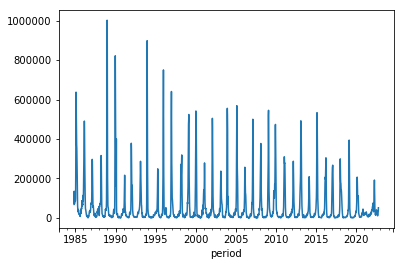

In [71]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

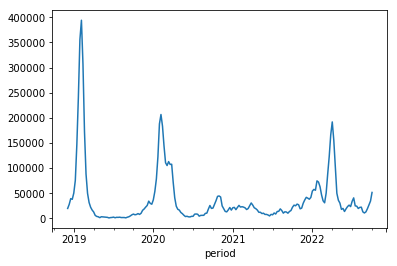

In [72]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [73]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er september, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [74]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)    


Voici les incidences annuelles.

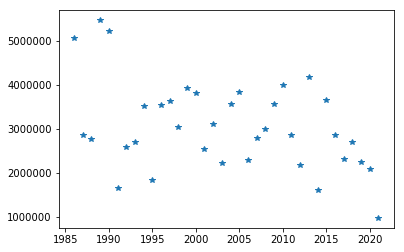

In [75]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [76]:
yearly_incidence.sort_values()

2021     978259
2014    1601698
1991    1663610
1995    1828304
2020    2078964
2012    2183912
2003    2234514
2019    2254363
2006    2297262
2017    2322818
2001    2540826
1992    2590314
1993    2699482
2018    2701716
1988    2759663
2007    2786458
2011    2852504
2016    2859019
1987    2867464
2008    2984311
1998    3047298
2002    3115484
1994    3514133
1996    3540251
2009    3558474
2004    3572810
1997    3624129
2015    3647492
2000    3808190
2005    3831409
1999    3914003
2010    3992174
2013    4176872
1986    5050543
1990    5214494
1989    5461328
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

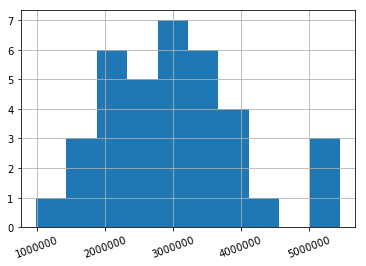

In [77]:
yearly_incidence.hist(xrot=20)